In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))  # Train for 1 epoch for quick demonstration

# Save the trained model
model.save("mnist_model.h5")

# Convert the model to TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Apply dynamic range quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
quantized_model = converter.convert()

# Save the quantized model
with open("mnist_model_quantized.tflite", "wb") as f:
    f.write(quantized_model)

print("Quantized model saved as 'mnist_model_quantized.tflite'.")

# Evaluate the quantized model
interpreter = tf.lite.Interpreter(model_path="mnist_model_quantized.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8709 - loss: 0.4449 - val_accuracy: 0.9515 - val_loss: 0.1609
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9632 - loss: 0.1235 - val_accuracy: 0.9721 - val_loss: 0.0908
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9772 - loss: 0.0781 - val_accuracy: 0.9749 - val_loss: 0.0855
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9830 - loss: 0.0577 - val_accuracy: 0.9785 - val_loss: 0.0730
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9861 - loss: 0.0438 - val_accuracy: 0.9751 - val_loss: 0.0809


Saved artifact at '/tmp/tmpbqhii5_z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136232084710928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136232085095696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136232080379568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136232085097632: TensorSpec(shape=(), dtype=tf.resource, name=None)
Quantized model saved as 'mnist_model_quantized.tflite'.


Enter the index of the test image (0-9999): 123


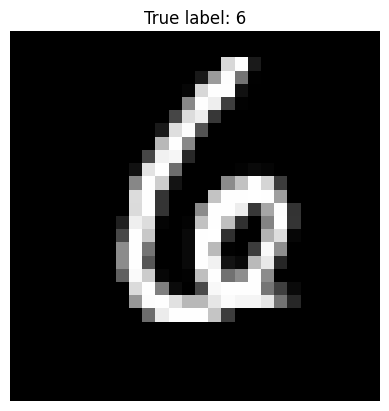

Quantized model prediction: 6, True label: 6


In [ ]:
import matplotlib.pyplot as plt

# Allow user to input a test image index
try:
    user_input = int(input(f"Enter the index of the test image (0-{len(x_test) - 1}): "))
    if 0 <= user_input < len(x_test):
        # Show the image
        plt.imshow(x_test[user_input], cmap='gray')
        plt.title(f"True label: {y_test[user_input]}")
        plt.axis('off')
        plt.show()

        # Test the selected image
        test_image = x_test[user_input:user_input + 1].astype('float32')
        interpreter.set_tensor(input_details[0]['index'], test_image)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        print(f"Quantized model prediction: {output_data.argmax()}, True label: {y_test[user_input]}")
    else:
        print("Invalid index! Please enter a number within the valid range.")
except ValueError:
    print("Invalid input! Please enter a valid integer.")


Enter the index of the test image (0-9999): 687


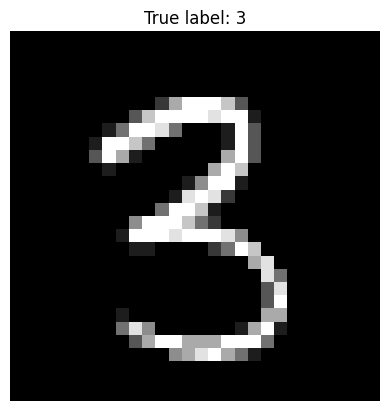

Quantized model prediction: 3, True label: 3


In [ ]:
import matplotlib.pyplot as plt

# Allow user to input a test image index
try:
    user_input = int(input(f"Enter the index of the test image (0-{len(x_test) - 1}): "))
    if 0 <= user_input < len(x_test):
        # Show the image
        plt.imshow(x_test[user_input], cmap='gray')
        plt.title(f"True label: {y_test[user_input]}")
        plt.axis('off')
        plt.show()

        # Test the selected image
        test_image = x_test[user_input:user_input + 1].astype('float32')
        interpreter.set_tensor(input_details[0]['index'], test_image)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        print(f"Quantized model prediction: {output_data.argmax()}, True label: {y_test[user_input]}")
    else:
        print("Invalid index! Please enter a number within the valid range.")
except ValueError:
    print("Invalid input! Please enter a valid integer.")


Enter the index of the test image (0-9999): 9876


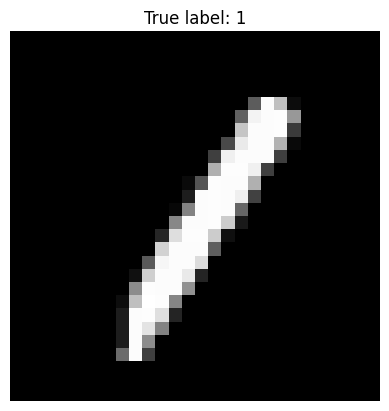

Quantized model prediction: 1, True label: 1


In [ ]:
import matplotlib.pyplot as plt

# Allow user to input a test image index
try:
    user_input = int(input(f"Enter the index of the test image (0-{len(x_test) - 1}): "))
    if 0 <= user_input < len(x_test):
        # Show the image
        plt.imshow(x_test[user_input], cmap='gray')
        plt.title(f"True label: {y_test[user_input]}")
        plt.axis('off')
        plt.show()

        # Test the selected image
        test_image = x_test[user_input:user_input + 1].astype('float32')
        interpreter.set_tensor(input_details[0]['index'], test_image)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        print(f"Quantized model prediction: {output_data.argmax()}, True label: {y_test[user_input]}")
    else:
        print("Invalid index! Please enter a number within the valid range.")
except ValueError:
    print("Invalid input! Please enter a valid integer.")
